In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("usd_exchange_rate.csv")
df.head()
df.tail()
df.dtypes
df.shape

(5711, 5)

In [4]:
df.columns

Index(['Date', 'USD_to_RWF_Rate', 'Day_of_Week', 'Month', 'Year'], dtype='object')

In [5]:
df.describe()

,USD_to_RWF_Rate,Year
count,5711.000000,5711.000000
mean,881.268458,2017.509543
std,243.529036,4.520807
min,516.956100,2010.000000
25%,679.061750,2014.000000
50%,855.515700,2018.000000
75%,1015.336400,2021.000000
max,1458.990500,2025.000000


In [6]:
df2025 = df[ df['Year'] == 2025 ]

In [7]:
df2025.describe()

,USD_to_RWF_Rate,Year
count,302.000000,302.0
mean,1429.118034,2025.0
std,19.346476,0.0
min,1376.893300,2025.0
25%,1415.140625,2025.0
50%,1435.618400,2025.0
75%,1445.022750,2025.0
max,1458.990500,2025.0


In [8]:
df2010 = df[ df['Year'] == 2010 ]
df2010.describe()

,USD_to_RWF_Rate,Year
count,295.000000,295.0
mean,584.128415,2010.0
std,13.210650,0.0
min,556.361100,2010.0
25%,573.849300,2010.0
50%,582.557800,2010.0
75%,596.090900,2010.0
max,609.511900,2010.0


16


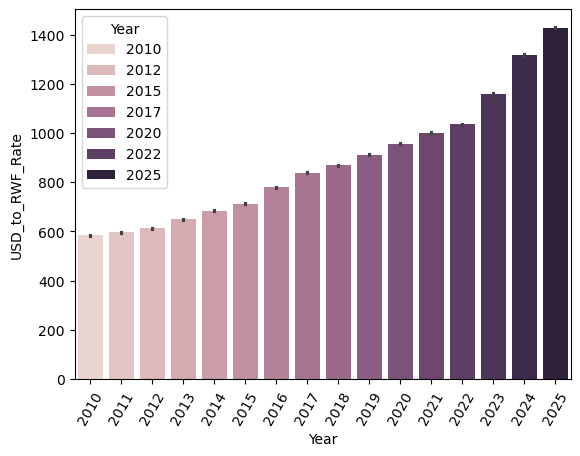

In [9]:
rain_bow = ["#681D1D","#A15C17","#70701D","#387C38","#262681",'#4B0082',"#A82020",'#FF7F00',"#B6B614","#249F24",'#0000FF','#FF0000','#FF7F00','#8B00FF','#FFFF00','#00FF00']
print(len(rain_bow))
sns.barplot(x='Year',y='USD_to_RWF_Rate', data=df, hue='Year' )
plt.xticks(rotation=60)

plt.show()

In [10]:
df2020 = df[ df['Year'] == 2020 ]
mean2020 = df2020['USD_to_RWF_Rate'].mean()
mean2025 = df2025['USD_to_RWF_Rate'].mean()
print(mean2020)
print(mean2025)

957.1625196721311
1429.1180341059603


In [11]:
principle = 1000000
in2020 = principle / mean2020
in2025 = in2020 * mean2025

a = in2025
p = principle
t = 6
rate = ( (a/p)**(1/t) ) - 1
print("2020 USD: ", round(in2020,3), "In Rwf: ",principle)
print("2025 Rwf: ", round(in2025,3))
print(float(rate)*100)

2020 USD:  1044.755 In Rwf:  1000000
2025 Rwf:  1493077.722
6.908869189252154


In [12]:
# if use interest 5% on year
interest_rate = 0.05
time = 6
one = 1
compound_cash = principle*( one + interest_rate)**time
print('comppund is: ',compound_cash)

comppund is:  1340095.6406250005


In [13]:
print(in2025 - compound_cash)

152982.08100945526


In [14]:
datafit = df[['USD_to_RWF_Rate','Year']].groupby("Year").mean()
datafit
x = df['Year'].unique()
z =datafit['USD_to_RWF_Rate']
print(z)
datafit.to_csv("grouptable.csv")

Year
2010     584.128415
2011     595.874498
2012     612.527948
2013     649.455019
2014     684.818802
2015     712.313327
2016     779.904749
2017     838.662257
2018     868.795138
2019     911.500397
2020     957.162520
2021    1001.338289
2022    1035.739503
2023    1158.455475
2024    1317.685931
2025    1429.118034
Name: USD_to_RWF_Rate, dtype: float64


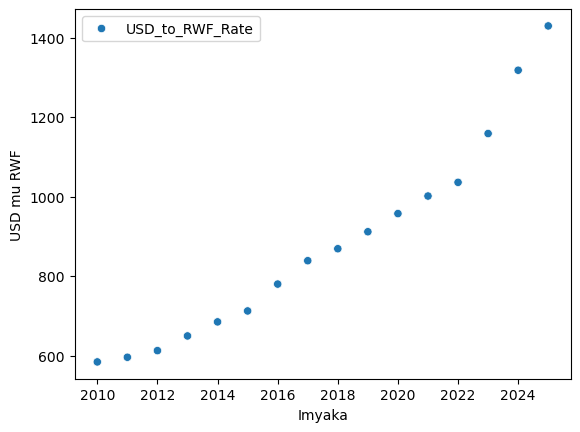

In [15]:
sns.scatterplot(data=datafit) 
plt.ylabel("USD mu RWF")
plt.xlabel("Imyaka")
plt.savefig("ivunjisha1.png")
plt.show()

In [16]:
df['Year'].corr(df['USD_to_RWF_Rate'])

np.float64(0.9625847924262165)

<Axes: ylabel='USD_to_RWF_Rate'>

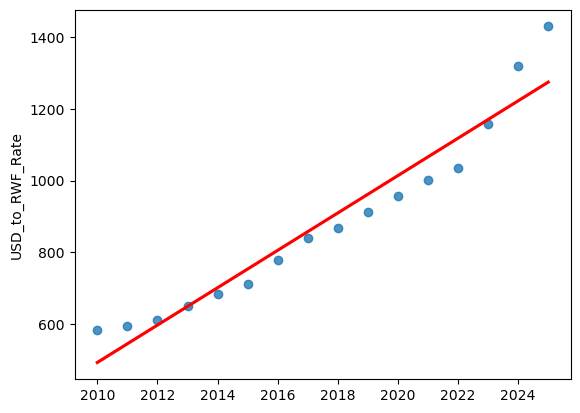

In [17]:
x = df['Year'].unique()
y = df['USD_to_RWF_Rate'].mean()

z =datafit['USD_to_RWF_Rate']
sns.regplot( x=x, y=z,ci=None , line_kws={"color":"red"})

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

dataframes = pd.read_csv("grouptable.csv")
print(dataframes)
X = dataframes[['Year']]
y = dataframes['USD_to_RWF_Rate']
model =  LinearRegression()
model.fit(X,y)
future_year = np.array([2010,2027]).reshape(-1,1)
pred = model.predict(future_year)
for y_ , p in zip(future_year.flatten(),pred):
    print(y_, " -> ", round(p,2))

    Year  USD_to_RWF_Rate
0   2010       584.128415
1   2011       595.874498
2   2012       612.527948
3   2013       649.455019
4   2014       684.818802
5   2015       712.313327
6   2016       779.904749
7   2017       838.662257
8   2018       868.795138
9   2019       911.500397
10  2020       957.162520
11  2021      1001.338289
12  2022      1035.739503
13  2023      1158.455475
14  2024      1317.685931
15  2025      1429.118034
2010  ->  493.1
2027  ->  1378.22


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
